Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from matplotlib import pyplot as plt


Set Paths

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/dataset_augmented"
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 10

Load Dataset - Splitting

In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

num_classes = train.num_classes
print("Classes:", train.class_indices)


Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Classes: {'clear_skin': 0, 'dark_spots': 1, 'puffy_eyes': 2, 'wrinkles': 3}


Build EfficientNetB0 model

In [ ]:
base = EfficientNetB0(include_top=False, weights="imagenet",
                      input_shape=(224, 224, 3))
base.trainable = False  # freeze CNN

x = GlobalAveragePooling2D()(base.output)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base.input, outputs=output)

loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

model.compile(
    optimizer=Adam(1e-4),
    loss=loss_fn,
    metrics=["accuracy"]
)



16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Callbacks (EarlyStopping, ReduceLROnPlateau, ModelCheckpoint)

In [ ]:
checkpoint = ModelCheckpoint(
    "best1_val_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

callbacks = [checkpoint, early, reduce_lr]


Train the model

In [ ]:
history1 = model.fit(
    train,
    validation_data=val,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4991 - loss: 1.2705
Epoch 1: val_accuracy improved from -inf to 0.77000, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 978s 10s/step - accuracy: 0.5004 - loss: 1.2688 - val_accuracy: 0.7700 - val_loss: 0.8634 - learning_rate: 1.0000e-04
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7998 - loss: 0.8328
Epoch 2: val_accuracy improved from 0.77000 to 0.81500, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.7999 - loss: 0.8324 - val_accuracy: 0.8150 - val_loss: 0.7675 - learning_rate: 1.0000e-04
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8644 - loss: 0.6978
Epoch 3: val_accuracy improved from 0.81500 to 0.83500, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.8644 - loss: 0.6979 - val_accuracy: 0.8350 - val_loss: 0.7140 - learning_rate: 1.0000e-04
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8870 - loss: 0.6566
Epoch 4: val_accuracy improved from 0.83500 to 0.85500, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8870 - loss: 0.6565 - val_accuracy: 0.8550 - val_loss: 0.6824 - learning_rate: 1.0000e-04
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9109 - loss: 0.6073
Epoch 5: val_accuracy improved from 0.85500 to 0.87000, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9109 - loss: 0.6072 - val_accuracy: 0.8700 - val_loss: 0.6602 - learning_rate: 1.0000e-04
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9402 - loss: 0.5780
Epoch 6: val_accuracy improved from 0.87000 to 0.88000, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9402 - loss: 0.5780 - val_accuracy: 0.8800 - val_loss: 0.6431 - learning_rate: 1.0000e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9502 - loss: 0.5419
Epoch 7: val_accuracy improved from 0.88000 to 0.89000, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9501 - loss: 0.5420 - val_accuracy: 0.8900 - val_loss: 0.6238 - learning_rate: 1.0000e-04
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9455 - loss: 0.5500
Epoch 8: val_accuracy improved from 0.89000 to 0.89500, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9456 - loss: 0.5499 - val_accuracy: 0.8950 - val_loss: 0.6121 - learning_rate: 1.0000e-04
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9660 - loss: 0.5210
Epoch 9: val_accuracy improved from 0.89500 to 0.90500, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9660 - loss: 0.5211 - val_accuracy: 0.9050 - val_loss: 0.6025 - learning_rate: 1.0000e-04
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9637 - loss: 0.5143
Epoch 10: val_accuracy improved from 0.90500 to 0.91750, saving model to best1_val_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9637 - loss: 0.5143 - val_accuracy: 0.9175 - val_loss: 0.5865 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 10.


Metrics

In [ ]:
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(1, len(train_acc) + 1)

In [ ]:
print("Final Training Accuracy :", train_acc[-1])
print("Final Validation Accuracy :", val_acc[-1])
print("Final Training Loss :", train_loss[-1])
print("Final Validation Loss :", val_loss[-1])

Final Training Accuracy : 0.965624988079071
Final Validation Accuracy : 0.9175000190734863
Final Training Loss : 0.5141372680664062
Final Validation Loss : 0.5865442752838135


Training Vs Validation Accuracy

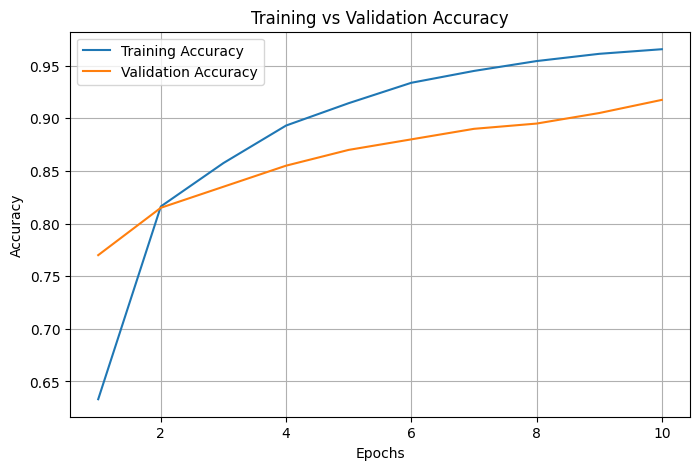

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Training vs Validation

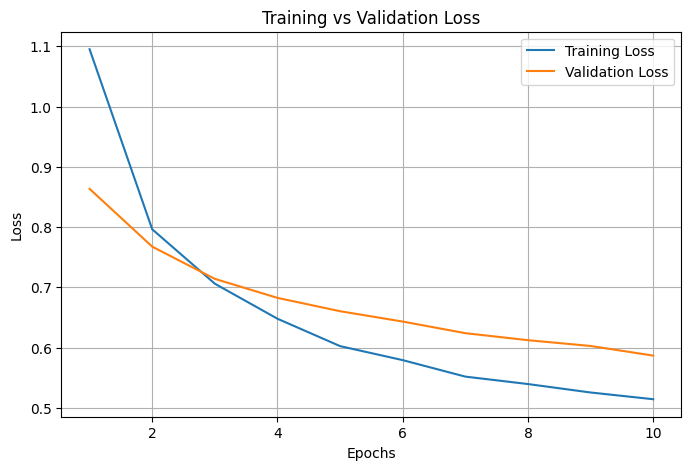

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save("best1_val_model.h5")


In [ ]:
from google.colab import files
files.download("best1_val_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>